In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_flow = pd.read_csv('images_done/attention_flow.txt', header = None)
df_rollout = pd.read_csv('images_done/attention_rollout.txt', header = None)
df_grad_rollout = pd.read_csv('images_done/attention_grad_rollout.txt', header = None)
df_blank_out = pd.read_csv('images_done/blank_out.txt', header = None)

# Getting max index

In [3]:
n_els = 20

df_rollout_max = df_rollout.apply(lambda x : set(x.sort_values(ascending=False).head(n_els).index), axis = 1)
df_grad_max = df_grad_rollout.apply(lambda x : set(x.sort_values(ascending=False).head(n_els).index), axis = 1)
df_flow_max = df_flow.apply(lambda x : set(x.sort_values(ascending=False).head(n_els).index), axis = 1)

df_blank_out_max = df_blank_out.apply(lambda x : set(x.sort_values(ascending=False).head(n_els).index), axis = 1)

In [4]:
common_elements = df_blank_out_max.combine(df_flow_max, func = lambda s1, s2 : s1.intersection(s2)).apply(lambda x : len(x)) / n_els

print(common_elements.mean())
print(common_elements.std())

0.1211065573770492
0.08687063437846923


# Paper approach

In [5]:
performance_dict = {}

for idx in range(df_flow.shape[0]):
    rollout_corr = df_blank_out.iloc[idx,:].corr(df_rollout.iloc[idx,:], method='spearman')
    grad_rollout_corr = df_blank_out.iloc[idx,:].corr(df_grad_rollout.iloc[idx,:], method='spearman')
    flow_corr = df_blank_out.iloc[idx,:].corr(df_flow.iloc[idx,:], method='spearman')
    
    performance_dict[idx] = [rollout_corr,grad_rollout_corr , flow_corr]
    
df_corrs = pd.DataFrame(performance_dict).T.rename({0 : 'rollout', 1: 'grad_rollout', 2: 'flow'}, axis = 1)
df_corrs.describe()

,rollout,grad_rollout,flow
count,244.000000,244.000000,244.000000
mean,0.109094,0.113185,-0.010938
std,0.236275,0.207683,0.132560
min,-0.572575,-0.452795,-0.447661
25%,-0.051216,-0.032821,-0.089740
50%,0.105721,0.109657,-0.012506
75%,0.283110,0.256540,0.073610
max,0.650453,0.602786,0.438896


In [6]:
performance_dict = {}

for idx in range(df_flow.shape[0]):
    grad_rollout_corr = df_rollout.iloc[idx,:].corr(df_grad_rollout.iloc[idx,:], method='spearman')
    flow_corr = df_rollout.iloc[idx,:].corr(df_flow.iloc[idx,:], method='spearman')
    
    performance_dict[idx] = [grad_rollout_corr , flow_corr]
    
df_corrs = pd.DataFrame(performance_dict).T.rename({0 : 'grad_rollout', 1: 'flow'}, axis = 1)
df_corrs.describe()

,grad_rollout,flow
count,244.000000,244.000000
mean,0.471193,0.238227
std,0.224819,0.165661
min,-0.171307,-0.234687
25%,0.331623,0.122849
50%,0.516407,0.251650
75%,0.639602,0.346300
max,0.844401,0.661277


In [7]:
performance_dict = {}

for idx in range(df_flow.shape[0]):
    rollout_corr = df_flow.iloc[idx,:].corr(df_rollout.iloc[idx,:], method='spearman')
    grad_rollout_corr = df_flow.iloc[idx,:].corr(df_grad_rollout.iloc[idx,:], method='spearman')
    
    performance_dict[idx] = [rollout_corr , grad_rollout_corr]
    
df_corrs = pd.DataFrame(performance_dict).T.rename({0 : 'rollout', 1: 'grad'}, axis = 1)
df_corrs.describe()

,rollout,grad
count,244.000000,244.000000
mean,0.238227,0.206385
std,0.165661,0.201752
min,-0.234687,-0.475615
25%,0.122849,0.081318
50%,0.251650,0.216118
75%,0.346300,0.343391
max,0.661277,0.757209


# Attacks

## Rollout

In [10]:
df_rollout = pd.read_csv("attack_data/saver_rollout.txt", sep = ' ', header=None).iloc[:,3:].rename({3:"Out", 4:"In"},axis = 1)
df_filtered = df_rollout.loc[~((df_rollout['Out'] == 50) & (df_rollout['In'] == 50))]

In [11]:
print((df_filtered['Out'] - df_filtered['In']).mean())
print((df_filtered['Out'] - df_filtered['In']).std())

9.020833333333334
28.642349385510926


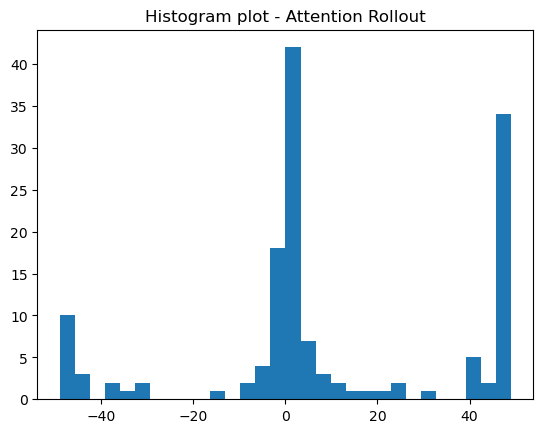

In [12]:
plt.hist(df_filtered['Out'] - df_filtered['In'], bins = 30)
plt.title("Histogram plot - Attention Rollout")
plt.show()

## Attention Flow

In [13]:
df_rollout = pd.read_csv("attack_data/saver_result_attention_flow.txt", sep = ' ', header=None).iloc[:,3:].rename({3:"Out", 4:"In"},axis = 1)
df_filtered = df_rollout.loc[~((df_rollout['Out'] == 50) & (df_rollout['In'] == 50))]

In [14]:
print((df_filtered['Out'] - df_filtered['In']).mean())
print((df_filtered['Out'] - df_filtered['In']).std())

-2.4552845528455283
23.364626490165072


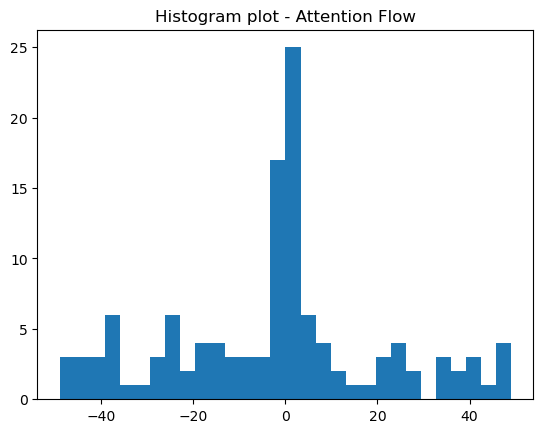

In [15]:
plt.title("Histogram plot - Attention Flow")
plt.hist(df_filtered['Out'] - df_filtered['In'], bins = 30)
plt.show()

## Gradient Rollout

In [16]:
df_rollout = pd.read_csv("attack_data/saver_grad.txt", sep = ' ', header=None).iloc[:,3:].rename({3:"Out", 4:"In"},axis = 1)
df_filtered = df_rollout.loc[~((df_rollout['Out'] == 50) & (df_rollout['In'] == 50))]

In [17]:
print((df_filtered['Out'] - df_filtered['In']).mean())
print((df_filtered['Out'] - df_filtered['In']).std())

2.5692307692307694
24.79995575813085


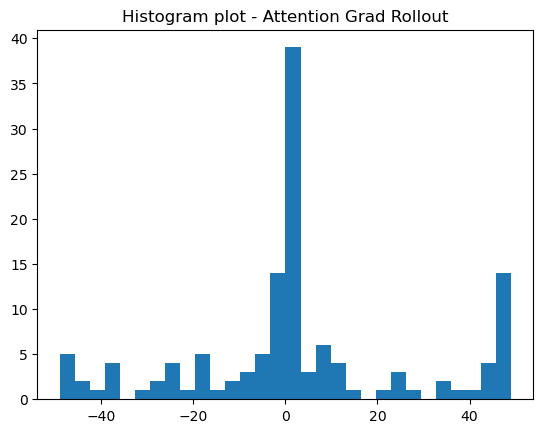

In [18]:
plt.title("Histogram plot - Attention Grad Rollout")
plt.hist(df_filtered['Out'] - df_filtered['In'], bins = 30)
plt.show()